## Working with the Kaggle Database

In [5]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
#song_file = pd.HDFStore('kaggle_sample_data_1.h5')
file_paths = glob('MillionSongSubset/data/**/*.h5', recursive=True) #got 10,000 song paths yay!

#keys return a dataframe of one row for all those columns


#problem: only does returns the data frame for the first song
def get_kaggle(path_list):
    df = pd.DataFrame() #initiate empty data frame to return with all songs
    #for every file path i want to get the song into a data frame
    for path in path_list:
        file = pd.HDFStore('MillionSongSubset/AdditionalFiles/subset_msd_summary_file.h5') #need to open the file from path
        #need to get the dataframe for every song's key to be concat together into one dataframe
        file_df = pd.DataFrame()
        for key in file.keys():
            file_df = pd.concat([file_df, file[key]], axis = 1) #puts everything into a row for the song
        df = df.append(file_df)
        unwanted_columns = ['analysis_sample_rate','analyzer_version', 'artist_7digitalid','artist_familiarity',
                            'artist_id','artist_latitude','artist_longitude','artist_mbid',
                            'artist_playmeid','audio_md5','bars_confidence','bars_start','beats_confidence',
                            'beats_start','end_of_fade_in','idx_bars_confidence','idx_bars_start','idx_beats_confidence',
                            'idx_sections_confidence','idx_sections_start','idx_segments_confidence',
                            'idx_artist_terms','idx_artist_mbtags','energy','danceability',
                            'idx_segments_loudness_max','idx_segments_loudness_max_time','idx_segments_pitches',
                            'idx_segments_start','idx_similar_artists','idx_tatums_confidence','key_confidence',
                            'idx_beats_start','idx_segments_loudness_start', 'idx_segments_timbre','idx_tatums_start',
                            'mode','mode_confidence','release','release_7digitalid','sections_confidence',
                            'sections_start','segments_confidence','segments_loudness_max','segments_loudness_max_time',
                            'segments_loudness_start','segments_pitches','segments_start','segments_timbre',
                            'similar_artists','song_id','start_of_fade_out','tatums_confidence','tatums_start',
                            'time_signature_confidence','track_7digitalid','track_id']
        df.drop(unwanted_columns, errors = 'ignore', inplace = True, axis = 1)
        file.close()
        return df


In [11]:

#! MillionSongSubset/data/A/R/R/TRARRZU128F4253CA2.h5'
#get_kaggle(file_paths)

In [2]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

/Users/jennwon/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
kaggle_df = get_kaggle(['MillionSongSubset/AdditionalFiles/subset_msd_summary_file.h5'])

NameError: name 'get_kaggle' is not defined

In [ ]:
kaggle_heatmap = sns.heatmap(kaggle_df.corr())

fig = kaggle_heatmap.get_figure()
fig.savefig('kaggle_heatmap.png', dpi=300) 

## I have the complete data frame from Billboards now!

In [1]:
complete_df = pd.read_pickle('complete_df.pkl')
complete_df.columns = complet_df.columns.map(str.strip)

kaggle_df.rename(columns = {'artist_name': 'artist', 'title': 'song'}, inplace = True)

counts = pd.DataFrame(complete_df.groupby(['Artist','Song']).size())
counts.reset_index(inplace = True)


NameError: name 'pd' is not defined

## Now I want to be able to merge this dataset with Kaggle based on the song and artist indexes

In [16]:
merged = kaggle_df.merge(counts)
merged.rename(columns = {merged.columns[-1]: 'num_weeks'}, inplace = True)


num_weeks            1.000000
key                  0.349771
artist_hotttnesss    0.139466
duration             0.022959
tempo               -0.031168
loudness            -0.043225
time_signature      -0.134513
year                -0.185567
song_hotttnesss     -0.270984
Name: num_weeks, dtype: float64

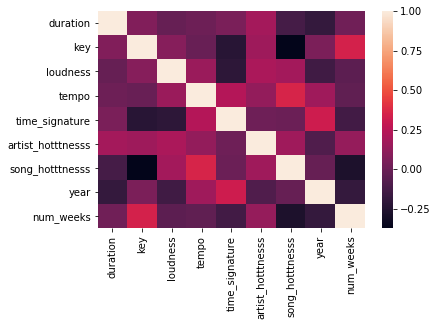

In [19]:
kaggle_heatmap = sns.heatmap(merged.corr())
fig = kaggle_heatmap.get_figure()
fig.savefig('kaggle_heatmap_with_weeks.png', dpi=1000) 

correlation = merged.corr()
correlation.num_weeks.sort_values(ascending = False)

In [20]:
merged.to_pickle('kaggled_merged_with_billboard.pkl')